<a href="https://colab.research.google.com/github/maxmiloiano/UTS-Machine-Learning/blob/main/UTS_Mesin_Learning_soal_1_dan_soal_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**No 1 Regresi (Harga Rumah)**

Saving HARGA RUMAH JAKSEL.xlsx to HARGA RUMAH JAKSEL.xlsx
Data awal:
    Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0        HARGA         LT         LB        JKT        JKM        GRS   
1  28000000000       1100        700          5          6        ADA   
2  19000000000        824        800          4          4        ADA   
3   4700000000        500        400          4          3        ADA   
4   4900000000        251        300          5          4        ADA   

  Unnamed: 6  
0       KOTA  
1     JAKSEL  
2     JAKSEL  
3     JAKSEL  
4     JAKSEL  

Data setelah konversi fitur kategorikal menjadi numerik:
   Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0         266         425         241          14          14           1   
1         125          27         217           9          10           0   
2          85         378         226           8           8           0   
3         173         279         13

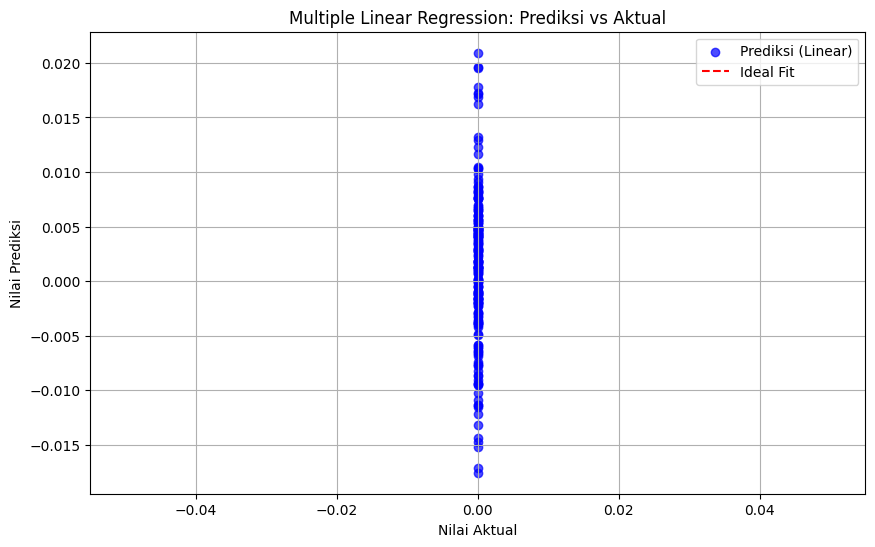

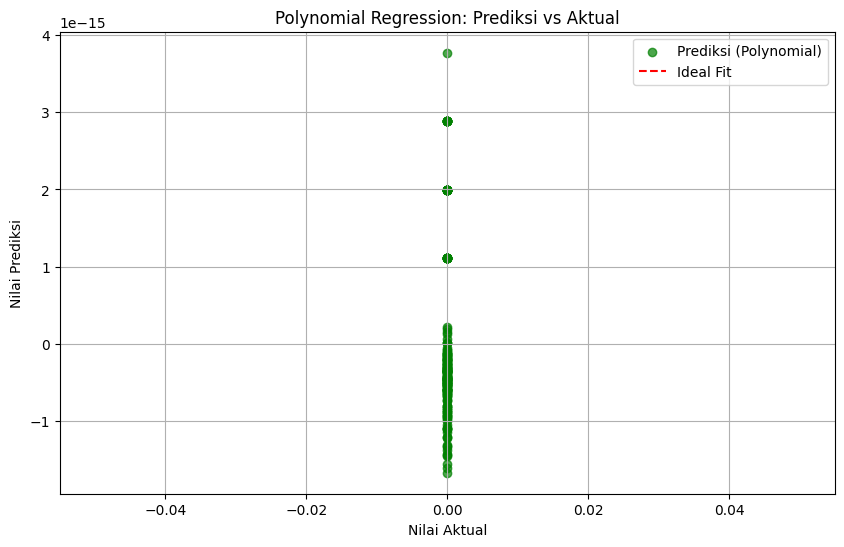

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
import matplotlib.pyplot as plt

# 1. Upload file xlsx
uploaded = files.upload()

# Membaca file xlsx
file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name)

# Menampilkan data awal
print("Data awal:")
print(data.head())

# 2. Mengubah fitur kategorikal menjadi numerik
le = LabelEncoder()
for col in data.select_dtypes(include=['object', 'category']).columns:
    data[col] = data[col].astype(str)  # Pastikan semua data di kolom adalah string
    data[col] = le.fit_transform(data[col])

print("\nData setelah konversi fitur kategorikal menjadi numerik:")
print(data.head())

# 3. Normalisasi data
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

print("\nData setelah normalisasi:")
print(data_scaled.head())

# 4. Split data menjadi fitur dan target
X = data_scaled.iloc[:, :-1]  # Fitur (semua kolom kecuali yang terakhir)
y = data_scaled.iloc[:, -1]   # Target (kolom terakhir)

# Membagi dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Multiple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# 6. Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

# 7. Evaluasi model
def evaluate_model(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"\nEvaluasi {model_name}:")
    print(f"R-squared: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    return r2, mse, rmse

print("\n=== Evaluasi Model ===")
r2_lin, mse_lin, rmse_lin = evaluate_model(y_test, y_pred_lin, "Multiple Linear Regression")
r2_poly, mse_poly, rmse_poly = evaluate_model(y_test, y_pred_poly, "Polynomial Regression")

# 8. Membandingkan performa model
print("\n=== Perbandingan Performa Model ===")
comparison = pd.DataFrame({
    "Model": ["Multiple Linear Regression", "Polynomial Regression"],
    "R-squared": [r2_lin, r2_poly],
    "MSE": [mse_lin, mse_poly],
    "RMSE": [rmse_lin, rmse_poly]
})
print(comparison)

# 9. Scatter Plot Multiple Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin, color='blue', label='Prediksi (Linear)', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.title('Multiple Linear Regression: Prediksi vs Aktual')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.legend()
plt.grid(True)
plt.show()

# 10. Scatter Plot Polynomial Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='green', label='Prediksi (Polynomial)', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.title('Polynomial Regression: Prediksi vs Aktual')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.legend()
plt.grid(True)
plt.show()




**No 2 Klasifikasi ( Titanic )**

--- Logistic Regression ---
Accuracy: 0.80
Precision: 0.78
Recall: 0.73
F1 Score: 0.76
Confusion Matrix:
[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



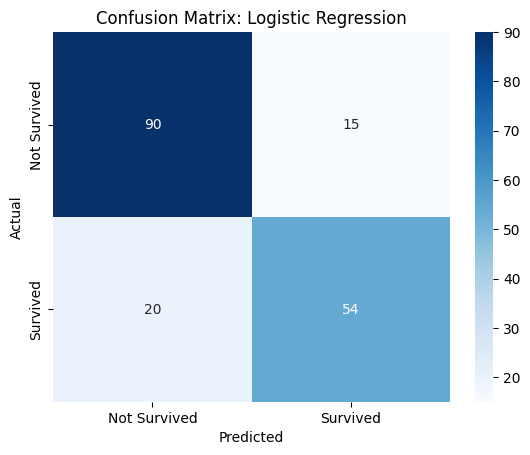

--- k-Nearest Neighbors ---
Accuracy: 0.80
Precision: 0.77
Recall: 0.73
F1 Score: 0.75
Confusion Matrix:
[[89 16]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



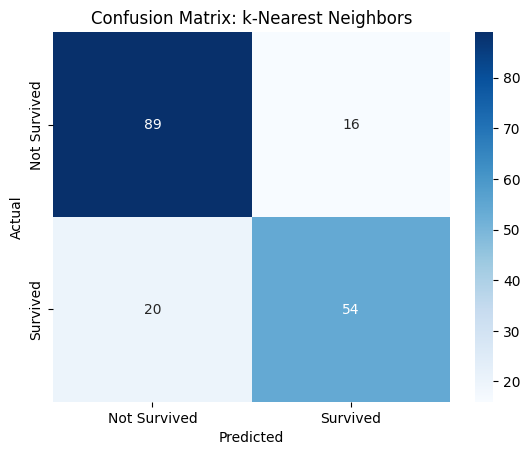

--- Support Vector Machine ---
Accuracy: 0.82
Precision: 0.82
Recall: 0.72
F1 Score: 0.76
Confusion Matrix:
[[93 12]
 [21 53]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



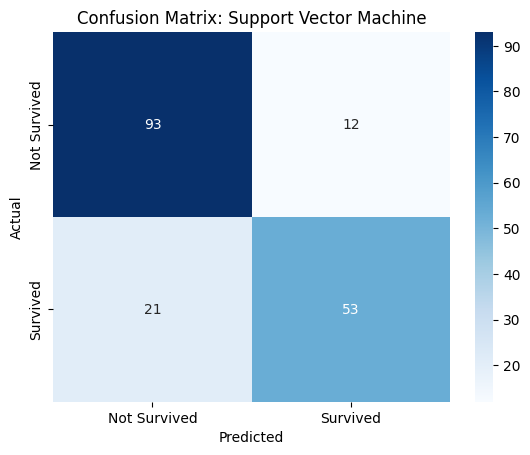

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = 'train.csv'  # Pastikan file train.csv berada di direktori yang sama dengan script ini
data = pd.read_csv(file_path)

# Preprocessing
# 1. Drop irrelevant columns
# Kolom yang tidak relevan dihapus karena tidak berkontribusi langsung ke prediksi
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# 2. Handle missing values
# Kolom 'Age' diisi dengan median karena fitur ini numerik dan median lebih robust terhadap outlier
data['Age'] = data['Age'].fillna(data['Age'].median())
# Kolom 'Embarked' diisi dengan modus karena fitur ini kategorikal dan modus adalah nilai yang paling umum
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# 3. Encode categorical features
# Fitur kategorikal 'Sex' dan 'Embarked' dikonversi menjadi nilai numerik menggunakan LabelEncoder
label_encoders = {}  # Menyimpan encoder untuk setiap kolom, jika ingin membalik encoding di masa depan
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 4. Split data into features and target
# Target adalah kolom 'Survived', sisanya adalah fitur
X = data.drop(columns=['Survived'])
y = data['Survived']

# 5. Normalize numeric features
# Standarisasi dilakukan agar semua fitur numerik memiliki rentang yang sama, penting untuk model seperti SVM dan kNN
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print metrics
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
evaluate_model(log_reg, X_train, X_test, y_train, y_test, "Logistic Regression")

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, X_train, X_test, y_train, y_test, "k-Nearest Neighbors")

# Support Vector Machine
svm = SVC(random_state=42)
evaluate_model(svm, X_train, X_test, y_train, y_test, "Support Vector Machine")


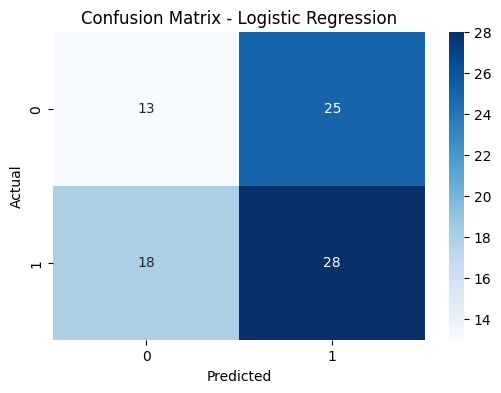

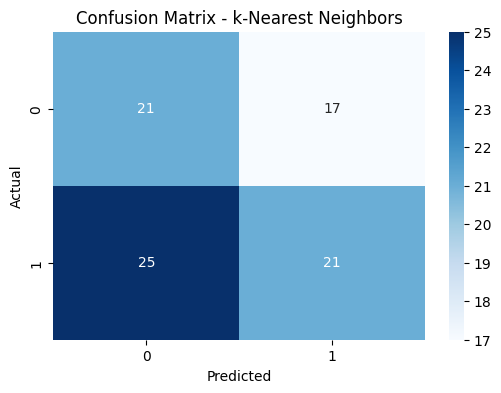

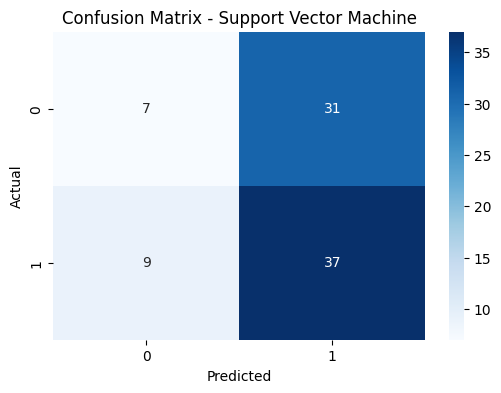

Model: Logistic Regression
Accuracy: 0.4881
Precision: 0.5283
Recall: 0.6087
F1 Score: 0.5657
Confusion Matrix:
[[13 25]
 [18 28]]


----------------------------------------

Model: k-Nearest Neighbors
Accuracy: 0.5000
Precision: 0.5526
Recall: 0.4565
F1 Score: 0.5000
Confusion Matrix:
[[21 17]
 [25 21]]


----------------------------------------

Model: Support Vector Machine
Accuracy: 0.5238
Precision: 0.5441
Recall: 0.8043
F1 Score: 0.6491
Confusion Matrix:
[[ 7 31]
 [ 9 37]]


----------------------------------------



In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = "test.csv"  # Sesuaikan dengan path di Colab jika file diunggah ulang
data = pd.read_csv(file_path)

# Preprocessing the data

# Drop irrelevant columns
data_cleaned = data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Handling missing values
imputer_age_fare = SimpleImputer(strategy="mean")
data_cleaned["Age"] = imputer_age_fare.fit_transform(data_cleaned[["Age"]])
data_cleaned["Fare"] = imputer_age_fare.fit_transform(data_cleaned[["Fare"]])

# Encode categorical features
label_enc = LabelEncoder()
data_cleaned["Sex"] = label_enc.fit_transform(data_cleaned["Sex"])
data_cleaned["Embarked"] = label_enc.fit_transform(data_cleaned["Embarked"])

# Assume "Survived" column as target (since it's missing in the dataset, add a placeholder)
# Placeholder: Random binary values for demonstration
data_cleaned["Survived"] = np.random.choice([0, 1], size=len(data_cleaned))

# Splitting dataset into features and target
X = data_cleaned.drop(columns=["Survived"])
y = data_cleaned["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

# Train, predict and evaluate each model
results = {}

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    }

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Display evaluation results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        if metric == "Confusion Matrix":
            print(f"{metric}:\n{value}\n")
        else:
            print(f"{metric}: {value:.4f}")
    print("\n" + "-"*40 + "\n")


Saving gender_submission.csv to gender_submission.csv
Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None

Data Awal:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

Missing Values Sebelum Imputasi:
PassengerId    0
Survived       0
dtype: int64

Missing Values Setelah Imputasi:
PassengerId    0
Survived       0
dtype: int64

Kolom Kategorikal Sebelum Encoding:
Index([], dtype='object')

Data Setelah Preprocessing dan Encoding:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

Logistic Regression:
Accuracy: 0.60
Prec

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

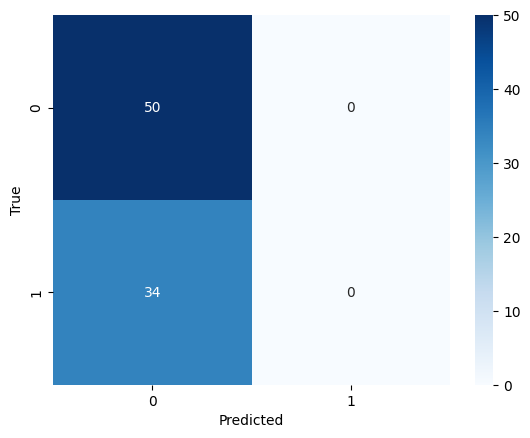


k-Nearest Neighbors:
Accuracy: 0.62
Precision: 0.56
Recall: 0.26
F1 Score: 0.36

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        50
           1       0.56      0.26      0.36        34

    accuracy                           0.62        84
   macro avg       0.60      0.56      0.54        84
weighted avg       0.60      0.62      0.58        84


Confusion Matrix:


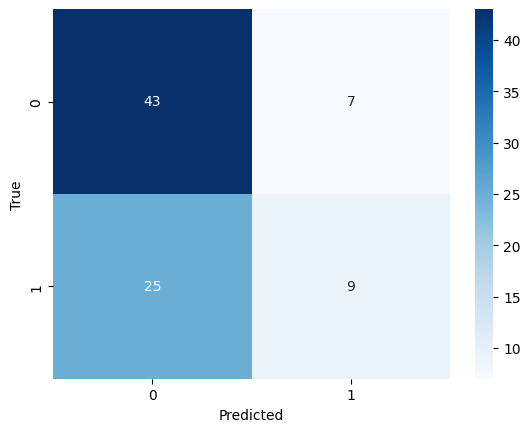


Support Vector Machine:
Accuracy: 0.60
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        50
           1       0.00      0.00      0.00        34

    accuracy                           0.60        84
   macro avg       0.30      0.50      0.37        84
weighted avg       0.35      0.60      0.44        84


Confusion Matrix:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

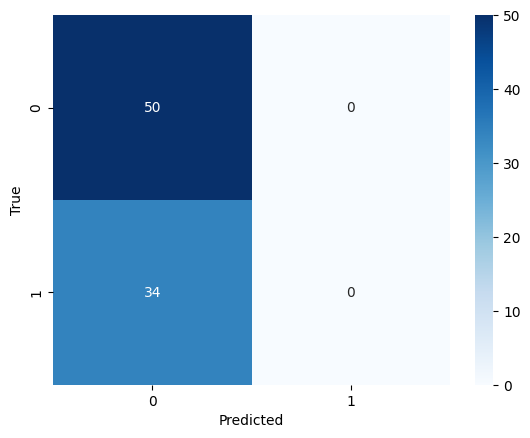

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
from google.colab import files
uploaded = files.upload()

# Membaca dataset
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Tampilkan informasi dataset
print("Informasi Dataset:")
print(data.info())
print("\nData Awal:")
print(data.head())

# Preprocessing Data
# 1. Menangani missing values
print("\nMissing Values Sebelum Imputasi:")
print(data.isnull().sum())  # Menampilkan jumlah missing values per kolom

# Menggunakan SimpleImputer untuk mengimputasi missing values
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

print("\nMissing Values Setelah Imputasi:")
print(data_imputed.isnull().sum())  # Memastikan tidak ada missing values setelah imputasi

# 2. Encoding fitur kategorikal
print("\nKolom Kategorikal Sebelum Encoding:")
categorical_columns = data_imputed.select_dtypes(include='object').columns
print(categorical_columns)

# Menggunakan LabelEncoder untuk encoding setiap kolom kategorikal
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le
    print(f"\nHasil Encoding untuk Kolom '{column}':")
    print(data_imputed[column].head())

# Tampilkan data setelah preprocessing
print("\nData Setelah Preprocessing dan Encoding:")
print(data_imputed.head())

# 3. Split data menjadi fitur dan target
X = data_imputed.drop(columns=['Survived'])  # Ganti 'Survived' sesuai kolom target pada dataset Anda
y = data_imputed['Survived']

# 4. Normalisasi fitur numerikal
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definisikan fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# 1. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print("\nLogistic Regression:")
evaluate_model(log_reg, X_test, y_test)

# 2. k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("\nk-Nearest Neighbors:")
evaluate_model(knn, X_test, y_test)

# 3. Support Vector Machine (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
print("\nSupport Vector Machine:")
evaluate_model(svm, X_test, y_test)
